Rough Decision Tree 

In [152]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score


from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import accuracy_score, plot_roc_curve, plot_confusion_matrix
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, plot_confusion_matrix, precision_score, recall_score 
from sklearn.model_selection import GridSearchCV


In [153]:
edited_df = pd.read_csv('C:/Users/tonym/Documents/Flatiron/phase_3/BankMarketingProject/data/eddited_bank.csv', sep = ';')

In [154]:
edited_df.dtypes

Unnamed: 0     int64
age            int64
job           object
marital       object
education     object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
poutcome      object
y             object
dtype: object

In [98]:
# convert target to integers 
edited_df['y'] = edited_df['y'].replace(to_replace=['no', 'yes'], value=[0, 1])

In [99]:
edited_df.head()

,Unnamed: 0,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,poutcome,y
0,0,58,management,married,tertiary,2143,yes,no,unknown,5,may,261,1,unknown,0
1,1,44,technician,single,secondary,29,yes,no,unknown,5,may,151,1,unknown,0
2,2,33,entrepreneur,married,secondary,2,yes,yes,unknown,5,may,76,1,unknown,0
3,3,47,blue-collar,married,unknown,1506,yes,no,unknown,5,may,92,1,unknown,0
4,4,33,unknown,single,unknown,1,no,no,unknown,5,may,198,1,unknown,0


Categorical columns
- job 
- contact
- marital
- education 
- month 
- poutcome 

In [100]:
edited_df['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [101]:
print(edited_df['contact'].unique())

['unknown' 'cellular' 'telephone']


In [102]:
print(edited_df['poutcome'].unique())

['unknown' 'failure' 'other' 'success']


In [103]:
print("Raw Counts")
print(edited_df["y"].value_counts())
print()
print("percentages")
print(edited_df["y"].value_counts(normalize=True))

Raw Counts
0    39922
1     5289
Name: y, dtype: int64

percentages
0    0.883015
1    0.116985
Name: y, dtype: float64


 a baseline modeless approach that always chose the majority class would have an accuracy of over 88%.

In [104]:
edited_df.dtypes

Unnamed: 0     int64
age            int64
job           object
marital       object
education     object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
poutcome      object
y              int64
dtype: object

In [105]:
X = edited_df.drop('y', axis = 1)
y = edited_df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

#### One hot encoder 

In [106]:
# http://localhost:8941/notebooks/Cat-in-the-Dat-Project/notebooks/Lindsey/EDA-Initial-Models.ipynb
# slighty changed 
num_cols = []
ohe_cols = []


for c in X.columns:
    if X[c].dtype in ['float64', 'int64']:
        num_cols.append(c)
    elif X[c].nunique() <= 12:
        ohe_cols.append(c)
   

In [107]:
print(num_cols)


['Unnamed: 0', 'age', 'balance', 'day', 'duration', 'campaign']


In [108]:
print(ohe_cols)

['job', 'marital', 'education', 'housing', 'loan', 'contact', 'month', 'poutcome']


In [109]:
# create transfomrers for pipelines 
# one hot encoding categorical columns 
ohe_transformer = Pipeline(steps=[ 
    ('oh_encoder', OneHotEncoder(handle_unknown='ignore'))
])
# impute just case there is any missing data 
num_transformer = Pipeline(steps=[
    ('num_imputer', SimpleImputer(strategy='median'))
    ])

In [110]:
# combining transformers in preprocessor 
preprocessor = ColumnTransformer(
    transformers=[
        ('num',num_transformer, num_cols),
        ('ohe', ohe_transformer, ohe_cols)        
    ])

In [111]:
# preprocessor.fit(X_train, y_train)

#### Run a model 

In [112]:
# base line tree 
dt_base = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state = 42))
])

In [113]:
 dt_base.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['Unnamed: 0', 'age',
                                                   'balance', 'day', 'duration',
                                                   'campaign']),
                                                 ('ohe',
                                                  Pipeline(steps=[('oh_encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['job', 'marital',
                                                   'education', 'housing',
                                                   'loan', 'contact', 'month',
                                   

#### running a cross validation 

In [114]:
cross_validate(dt_base, X_train, y_train, return_train_score=True)

{'fit_time': array([0.63330555, 0.63530087, 0.61638761, 0.62931442, 0.61834812]),
 'score_time': array([0.01396298, 0.01396275, 0.01495457, 0.01396108, 0.01396275]),
 'test_score': array([0.88838101, 0.88381009, 0.88543203, 0.88231824, 0.8855626 ]),
 'train_score': array([1., 1., 1., 1., 1.])}

In [115]:
cross_val_score(dt_base, X_train, y_train)

array([0.88838101, 0.88381009, 0.88543203, 0.88231824, 0.8855626 ])

### Some evaluation

In [118]:
y_pred = dt_base.predict(X_test)

In [119]:
# accuracy 
acc_base = accuracy_score(y_test, y_pred)
acc_base

0.8882597540475979

In [121]:
#precision 
pre_base = precision_score(y_test, y_pred)
pre_base

0.5335820895522388

In [122]:
#recall 
rec_base = recall_score(y_test, y_pred)
rec_base

0.5284552845528455

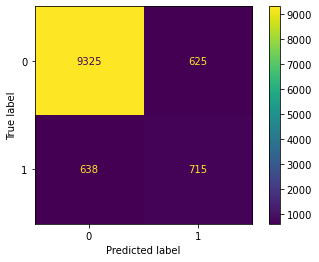

In [123]:
plot_confusion_matrix(dt_base, X_test, y_test)

In [124]:
dt_base.score(X_test, y_test)

0.8882597540475979

## Model 2 


#### Grid Search tests 

In [125]:
dt2 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state = 42))
])

In [126]:
dt2.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['Unnamed: 0', 'age',
                                                   'balance', 'day', 'duration',
                                                   'campaign']),
                                                 ('ohe',
                                                  Pipeline(steps=[('oh_encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['job', 'marital',
                                                   'education', 'housing',
                                                   'loan', 'contact', 'month',
                                   

In [127]:
grid = {
    "classifier__max_depth": [1, 5, 10],
    "classifier__min_samples_split": [2, 10, 100]
}

In [128]:
grid = GridSearchCV(estimator = dt2, param_grid = grid , scoring='accuracy')

In [129]:
output = grid.fit(X_train, y_train)

In [130]:
output.best_params_

{'classifier__max_depth': 5, 'classifier__min_samples_split': 100}

In [131]:
output.best_score_

0.9087531335386387

In [132]:
output.best_estimator_.score(X_test, y_test)

0.9085198619835442

Accuracy bumped up a few points to almost 91%

In [133]:
output.best_estimator_.fit(X_train, y_train)

test_preds = output.best_estimator_.predict(X_test)

In [139]:
#acc 
acc2 = accuracy_score(y_test, test_preds)
acc2


0.9085198619835442

precision bumped up higher from previous model 

In [138]:
# precision 
pre2 = precision_score(y_test, test_preds)
pre2

0.6277021617293835

recall bumped up higher from previous model as well

In [137]:
#recall 
rec2 = recall_score(y_test, test_preds)
rec2

0.5794530672579453

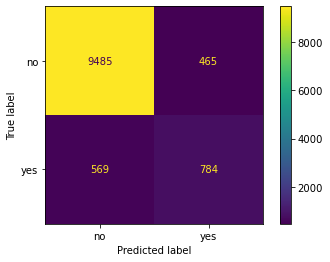

In [77]:
plot_confusion_matrix(output.best_estimator_, X_test, y_test)

We can use this dt2 model wih the best params to see what our final model should be. Either this or the logistic regression 

### Evaluating previous Model 

### Model using Params from the grid search 

In [144]:
dt_final = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state = 42, max_depth = 5,min_samples_split = 100 ))
])


In [146]:
dt_final.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['Unnamed: 0', 'age',
                                                   'balance', 'day', 'duration',
                                                   'campaign']),
                                                 ('ohe',
                                                  Pipeline(steps=[('oh_encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['job', 'marital',
                                                   'education', 'housing',
                                                   'loan', 'contact', 'month',
                                   

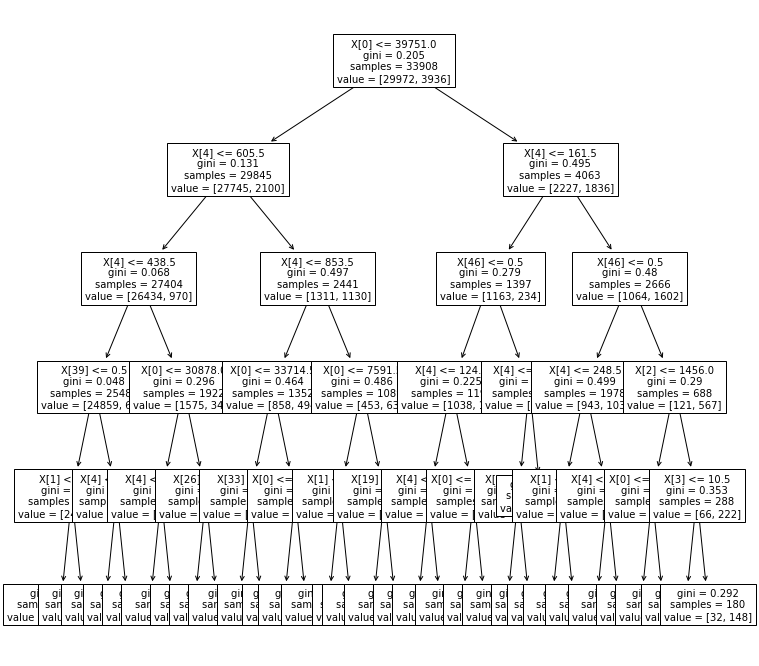

In [147]:
f,ax = plt.subplots(figsize=(12,12))
plot_tree(dt_final['classifier'], fontsize = 10);

In [148]:
cross_val_score(dt_final, X_train, y_train)

array([0.90710705, 0.90578001, 0.91212032, 0.90856806, 0.91019024])

Looking at confusion matrix again

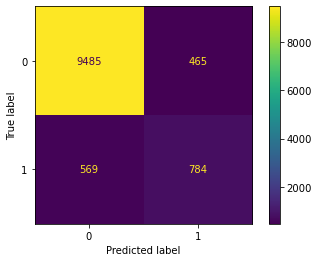

In [149]:
plot_confusion_matrix(dt_final, X_test, y_test)